# 1. 비선형 방정식 해법

### Bisection Method

In [ ]:
import math

# Define the function whose root we want to find
def f(x):
    return math.exp(x-1) - 5*x*x*x

if __name__ == "__main__":
    x0 = float(input("Enter the initial guess x0: "))
    x2 = float(input("Enter the second guess x2: "))
    tol = float(input("Enter tolerable error: "))
    max_iter = int(input("Enter maximum number of iterations: "))

    # Implementing Bisection Method
    print("\n*********************")
    print("Bisection Method")
    print("*********************")

    # Check if initial values are valid
    f0 = f(x0)
    f2 = f(x2)
    if f0 * f2 > 0:
        print("No root found in the given interval.")
        exit(1)

    iter = 0
    while True:
        iter += 1
        x1 = (x0 + x2) / 2
        f1 = f(x1)

        print("Iteration-{}:  x0 = {:10.6f}  x2 = {:10.6f}  x1 = {:10.6f}  f(x1) = {:10.6f}".format(iter, x0, x2, x1, f1))

        if f0 * f1 < 0:
            x2 = x1
        else:
            x0 = x1

        if abs(f1) < tol or iter >= max_iter:
            break

    print("\nRoot is approximately: {:.6f}".format(x1))


Enter the initial guess x0: 0
Enter the second guess x2: 1
Enter tolerable error: 1e-6
Enter maximum number of iterations: 100

*********************
Bisection Method
*********************
Iteration-1:  x0 =   0.000000  x2 =   1.000000  x1 =   0.500000  f(x1) =  -0.018469
Iteration-2:  x0 =   0.000000  x2 =   0.500000  x1 =   0.250000  f(x1) =   0.394242
Iteration-3:  x0 =   0.250000  x2 =   0.500000  x1 =   0.375000  f(x1) =   0.271590
Iteration-4:  x0 =   0.375000  x2 =   0.500000  x1 =   0.437500  f(x1) =   0.151082
Iteration-5:  x0 =   0.437500  x2 =   0.500000  x1 =   0.468750  f(x1) =   0.072886
Iteration-6:  x0 =   0.468750  x2 =   0.500000  x1 =   0.484375  f(x1) =   0.028909
Iteration-7:  x0 =   0.484375  x2 =   0.500000  x1 =   0.492188  f(x1) =   0.005652
Iteration-8:  x0 =   0.492188  x2 =   0.500000  x1 =   0.496094  f(x1) =  -0.006300
Iteration-9:  x0 =   0.492188  x2 =   0.496094  x1 =   0.494141  f(x1) =  -0.000297
Iteration-10:  x0 =   0.492188  x2 =   0.494141  x1 =  

###Newton Method

In [ ]:
import math

# Define the function whose root we want to find
def f(x):
    return math.exp(x)*math.sin(x) - x*x

# Define the derivative of the function
def f_prime(x):
    return math.exp(x)*(math.sin(x)+math.cos(x)) - 2*x

if __name__ == "__main__":
    x0 = float(input("Enter initial guess: "))
    tol = float(input("Enter tolerable error: "))
    max_iter = int(input("Enter maximum number of iterations: "))

    # Implementing Newton-Raphson Method
    print("\n*********************")
    print("Newton-Raphson Method")
    print("*********************")

    iter = 0
    while True:
        iter += 1
        f_val = f(x0)
        f_prime_val = f_prime(x0)

        # Check if derivative is zero
        if abs(f_prime_val) < 1e-10:
            print("Derivative is zero. Cannot continue.")
            exit(1)

        x1 = x0 - f_val / f_prime_val

        print("Iteration-{}:  x0 = {:10.6f}  x1 = {:10.6f}  f(x1) = {:10.6f}".format(iter, x0, x1, f(x1)))

        if abs(f(x1)) < tol or iter >= max_iter:
            break

        x0 = x1

    print("\nRoot is approximately: {:.6f}".format(x1))


Enter initial guess: 3
Enter tolerable error: 1e-6
Enter maximum number of iterations: 100

*********************
Newton-Raphson Method
*********************
Iteration-1:  x0 =   3.000000  x1 =   2.732516  f(x1) =  -1.352431
Iteration-2:  x0 =   2.732516  x1 =   2.631993  f(x1) =  -0.145876
Iteration-3:  x0 =   2.631993  x1 =   2.618254  f(x1) =  -0.002463
Iteration-4:  x0 =   2.618254  x1 =   2.618014  f(x1) =  -0.000001

Root is approximately: 2.618014


#2. 선형 방정식 해법

### Gausian Elimination Method

In [ ]:
import numpy as np

def lu_decomposition(A):
    n = len(A)
    L = np.eye(n)
    U = np.zeros((n, n))
    for i in range(n):
        for j in range(i, n):
            U[i, j] = A[i, j] - np.dot(L[i, :i], U[:i, j])
        for j in range(i+1, n):
            L[j, i] = (A[j, i] - np.dot(L[j, :i], U[:i, i])) / U[i, i]
    return L, U

def forward_substitution(L, b):
    n = len(b)
    y = np.zeros(n)
    for i in range(n):
        y[i] = (b[i] - np.dot(L[i, :i], y[:i])) / L[i, i]
    return y

def backward_substitution(U, y):
    n = len(y)
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (y[i] - np.dot(U[i, i+1:], x[i+1:])) / U[i, i]
    return x

def solve_linear_system(A, b):
    L, U = lu_decomposition(A)
    y = forward_substitution(L, b)
    x = backward_substitution(U, y)
    return x

if __name__ == "__main__":
    A = np.array([[10,2,0],
                  [2,10,3],
                  [0,3,8]])
    b = np.array([4,-34,8])

    x = solve_linear_system(A, b)
    print("Solution x:", x)


Solution x: [ 1.2920354  -4.46017699  2.67256637]


In [ ]:
a= 1.2920 / 6 * (0.5 - 2) -4.4601 / 6 * (0.5 - 2) + 9 / 2 + 15 / 2
print(a)

12.792024999999999


### Jacobi Method

In [ ]:
import numpy as np

def jacobi(A, b, x0, tol=1e-6, max_iter=100):
    n = len(b)
    x = x0.copy()
    x_prev = np.zeros_like(x)
    iteration = 0

    print("Initial guess:", x)
    print("-" * 25)

    for _ in range(max_iter):
        iteration += 1
        for i in range(n):
            x_prev[i] = x[i]

        for i in range(n):
            summ = 0.0
            for j in range(n):
                if j != i:
                    summ += A[i][j] * x_prev[j]
            x[i] = (b[i] - summ) / A[i][i]

        diff_norm = np.linalg.norm(x - x_prev)
        if diff_norm < tol:
            print("-" * 25)
            print("Jacobi Method converged in {} iterations.".format(iteration))
            print("Solution:", x)
            return x

        print("-------------------------")
        print("Iteration-{}:".format(iteration))
        for i in range(n):
            print("  x[{}] = {:.6f}".format(i+1, x[i]))



    print("-" * 25)
    print("Jacobi Method did not converge within the maximum number of iterations.")
    return x

# Input initial guess, tolerable error, and maximum number of iterations
x0 = np.array([float(val) for val in input("Enter initial guess (comma-separated values): ").split(",")])
tol = float(input("Enter tolerable error: "))
max_iter = int(input("Enter maximum number of iterations: "))

# Example matrix and vector
A = np.array([[6.0, -2.0, 1.0],
              [-2.0, 7.0, 2.0],
              [1.0, 2.0, -5.0]])
b = np.array([11.0, 5.0, -1.0])

# Run Jacobi Method with user-provided input
jacobi(A, b, x0, tol=tol, max_iter=max_iter)



Enter initial guess (comma-separated values): 0,0,0
Enter tolerable error: 1e-6
Enter maximum number of iterations: 100
Initial guess: [0. 0. 0.]
-------------------------
-------------------------
Iteration-1:
  x[1] = 1.833333
  x[2] = 0.714286
  x[3] = 0.200000
-------------------------
Iteration-2:
  x[1] = 2.038095
  x[2] = 1.180952
  x[3] = 0.852381
-------------------------
Iteration-3:
  x[1] = 2.084921
  x[2] = 1.053061
  x[3] = 1.080000
-------------------------
Iteration-4:
  x[1] = 2.004354
  x[2] = 1.001406
  x[3] = 1.038209
-------------------------
Iteration-5:
  x[1] = 1.994101
  x[2] = 0.990327
  x[3] = 1.001433
-------------------------
Iteration-6:
  x[1] = 1.996537
  x[2] = 0.997905
  x[3] = 0.994951
-------------------------
Iteration-7:
  x[1] = 2.000143
  x[2] = 1.000453
  x[3] = 0.998469
-------------------------
Iteration-8:
  x[1] = 2.000406
  x[2] = 1.000478
  x[3] = 1.000210
-------------------------
Iteration-9:
  x[1] = 2.000124
  x[2] = 1.000056
  x[3] = 

array([1.99999986, 0.99999985, 0.99999994])

### Gauss-Seidel Method

In [ ]:
import numpy as np

def gauss_seidel(A, b, x0, tol=1e-6, max_iterations=100):
    n = len(b)
    x = x0.copy()
    x_prev = np.zeros_like(x)
    iteration = 0
    for iteration in range(1, max_iterations + 1):
        for i in range(n):
            summ = 0.0
            for j in range(n):
                if j != i:
                    summ += A[i][j] * x[j]
            x[i] = (b[i] - summ) / A[i][i]

        diff_norm = sum(abs(x[i] - x_prev[i]) for i in range(n))
        if diff_norm < tol:
            print("-------------------------")
            print("Jacobi Method converged in {} iterations.".format(iteration))
            print("Solution:", x)
            return x

        x_prev = x.copy()
        print("-------------------------")
        print("Iteration-{}:".format(iteration))
        for i in range(n):
            print("  x[{}] = {:.6f}".format(i+1, x[i]))
    print("Doesn't converge within the maximum number of iterations.")
    return None

# Example usage
A = np.array([[6.0, -2.0, 1.0],
              [-2.0, 7.0, 2.0],
              [1.0, 2.0, -5.0]])
b = np.array([11.0, 5.0, -1.0])
x0 = np.zeros_like(b)

# Get initial guess, tolerable error, and maximum number of iterations from the user
initial_guess = input("Enter initial guess (comma-separated values): ")
x0 = np.array([float(val) for val in initial_guess.split(",")])
tolerance = float(input("Enter tolerable error: "))
max_iterations = int(input("Enter maximum number of iterations: "))

# Perform Gauss-Seidel method with user-provided input
gauss_seidel(A, b, x0, tol=tolerance, max_iterations=max_iterations)



Enter initial guess (comma-separated values): 0,0,0
Enter tolerable error: 1e-6
Enter maximum number of iterations: 100
-------------------------
Iteration-1:
  x[1] = 1.833333
  x[2] = 1.238095
  x[3] = 1.061905
-------------------------
Iteration-2:
  x[1] = 2.069048
  x[2] = 1.002041
  x[3] = 1.014626
-------------------------
Iteration-3:
  x[1] = 1.998243
  x[2] = 0.995319
  x[3] = 0.997776
-------------------------
Iteration-4:
  x[1] = 1.998810
  x[2] = 1.000295
  x[3] = 0.999880
-------------------------
Iteration-5:
  x[1] = 2.000118
  x[2] = 1.000068
  x[3] = 1.000051
-------------------------
Iteration-6:
  x[1] = 2.000014
  x[2] = 0.999990
  x[3] = 0.999999
-------------------------
Iteration-7:
  x[1] = 1.999997
  x[2] = 0.999999
  x[3] = 0.999999
-------------------------
Iteration-8:
  x[1] = 2.000000
  x[2] = 1.000000
  x[3] = 1.000000
-------------------------
Jacobi Method converged in 9 iterations.
Solution: [2.00000006 0.99999999 1.00000001]


array([2.00000006, 0.99999999, 1.00000001])

# 3. 초기값 문제의 해결

### Euler Method

Iteration 0: x = 0.00, y = 2.000000, z = 0.000000, Error = 0.000000
Iteration 1: x = 0.10, y = 2.000000, z = -0.800000, Error = 0.037338
Iteration 2: x = 0.20, y = 1.920000, z = -1.440000, Error = 0.058826
Iteration 3: x = 0.30, y = 1.776000, z = -1.920000, Error = 0.065167
Iteration 4: x = 0.40, y = 1.584000, z = -2.246400, Error = 0.058074
Iteration 5: x = 0.50, y = 1.359360, z = -2.430720, Error = 0.039960
Iteration 6: x = 0.60, y = 1.116288, z = -2.488320, Error = 0.013651
Iteration 7: x = 0.70, y = 0.867456, z = -2.437171, Error = 0.017869
Iteration 8: x = 0.80, y = 0.623739, z = -2.296719, Error = 0.051676
Iteration 9: x = 0.90, y = 0.394067, z = -2.086871, Error = 0.085083
Iteration 10: x = 1.00, y = 0.185380, z = -1.827124, Error = 0.115769
Iteration 11: x = 1.10, y = 0.002667, z = -1.535851, Error = 0.141865
Iteration 12: x = 1.20, y = -0.150918, z = -1.229748, Error = 0.162001
Iteration 13: x = 1.30, y = -0.273892, z = -0.923431, Error = 0.175316
Iteration 14: x = 1.40, y = -

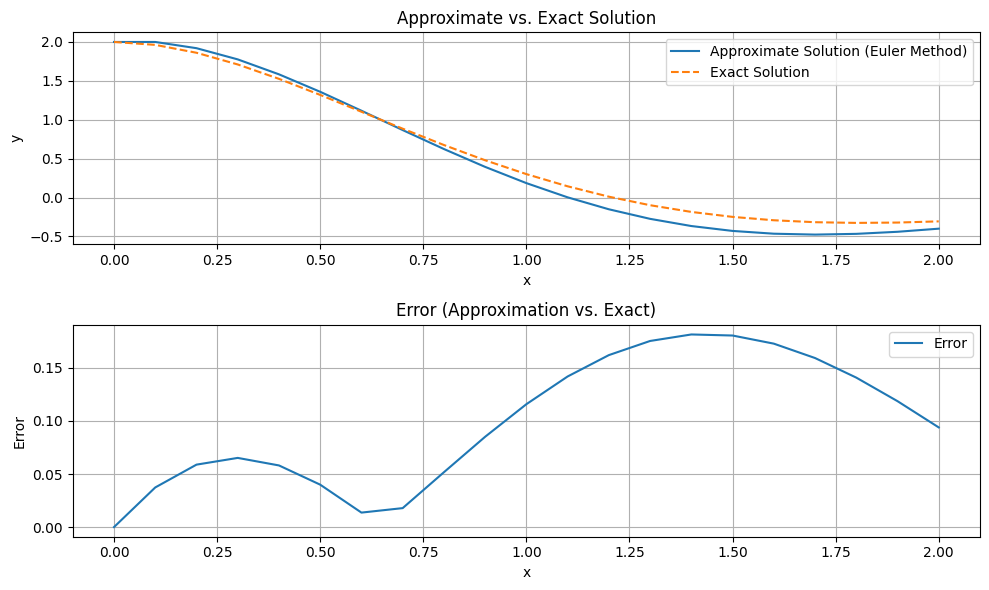

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y, z):
    """
    Define the derivative functions for the transformed system:
        dy/dx = z
        dz/dx = -2z - 4y
    """
    dydx = z
    dzdx = -2 * z - 4 * y
    return dydx, dzdx

def exact_solution(x):
    """
    Define the exact solution of the given differential equation.
    """
    return 2 * np.exp(-x) * (np.cos(np.sqrt(3) * x) + (1/np.sqrt(3)) * np.sin(np.sqrt(3) * x))

def euler_method(f, x0, y0, z0, h, num_steps):
    """
    Euler method for solving a system of first-order differential equations:
        dy/dx = f1(x, y, z)
        dz/dx = f2(x, y, z)

    Parameters:
        f: Function representing the system of differential equations
        x0: Initial x value
        y0: Initial y value (y(x0))
        z0: Initial z value (dy/dx at x0)
        h: Step size
        num_steps: Number of steps to take

    Returns:
        x_values: List of x values
        y_values: List of corresponding y values (approximate solution for y)
        errors: List of errors (difference between exact and approximate solution)
    """
    x_values = [x0]
    y_values = [y0]
    z_values = [z0]
    errors = [0]  # Initialize error list with 0 for the initial value

    xn = x0
    yn = y0
    zn = z0

    print(f"Iteration 0: x = {xn:.2f}, y = {yn:.6f}, z = {zn:.6f}, Error = {errors[-1]:.6f}")

    for i in range(num_steps):
        # Calculate derivatives at current point
        dydx, dzdx = f(xn, yn, zn)

        # Update y and z values using Euler method formulas
        yn = yn + h * dydx
        zn = zn + h * dzdx
        xn = xn + h

        x_values.append(xn)
        y_values.append(yn)
        z_values.append(zn)

        # Calculate error (difference from exact solution)
        exact_y = exact_solution(xn)
        error = np.abs(yn - exact_y)
        errors.append(error)

        print(f"Iteration {i+1}: x = {xn:.2f}, y = {yn:.6f}, z = {zn:.6f}, Error = {error:.6f}")

    return x_values, y_values, errors

# Initial conditions
x0 = 0
y0 = 2
z0 = 0
h = 0.1
num_steps = int(2 / h)  # Number of steps to cover the interval from 0 to 2

# Apply Euler method for the system of differential equations
x_values, y_values, errors = euler_method(f, x0, y0, z0, h, num_steps)

# Plot the approximate solution for y and error
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(x_values, y_values, label='Approximate Solution (Euler Method)')
plt.plot(x_values, exact_solution(np.array(x_values)), label='Exact Solution', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Approximate vs. Exact Solution')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(x_values, errors, label='Error')
plt.xlabel('x')
plt.ylabel('Error')
plt.title('Error (Approximation vs. Exact)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### 2nd Order R-K method

Iteration 0: x = 0.00, y = 2.000000, z = 0.000000, Error = 0.000000
Iteration 1: x = 0.10, y = 1.960000, z = -0.720000, Error = 0.002662
Iteration 2: x = 0.20, y = 1.856000, z = -1.281600, Error = 0.005174
Iteration 3: x = 0.30, y = 1.703536, z = -1.693440, Error = 0.007297
Iteration 4: x = 0.40, y = 1.517056, z = -1.968025, Error = 0.008870
Iteration 5: x = 0.50, y = 1.309592, z = -2.120560, Error = 0.009808
Iteration 6: x = 0.60, y = 1.092550, z = -2.167901, Error = 0.010087
Iteration 7: x = 0.70, y = 0.875588, z = -2.127639, Error = 0.009737
Iteration 8: x = 0.80, y = 0.666589, z = -2.017323, Error = 0.008826
Iteration 9: x = 0.90, y = 0.471698, z = -1.853830, Error = 0.007452
Iteration 10: x = 1.00, y = 0.295419, z = -1.652875, Error = 0.005730
Iteration 11: x = 1.10, y = 0.140752, z = -1.428651, Error = 0.003780
Iteration 12: x = 1.20, y = 0.009358, z = -1.193592, Error = 0.001725
Iteration 13: x = 1.30, y = -0.098252, z = -0.958242, Error = 0.000324
Iteration 14: x = 1.40, y = -0

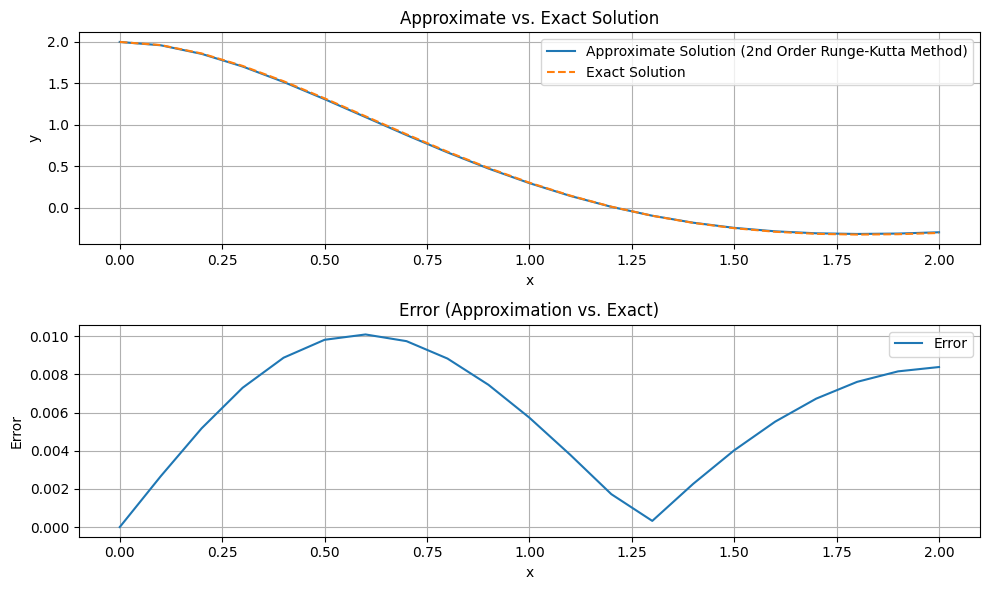

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y, z):
    """
    Define the derivative functions for the transformed system:
        dy/dx = z
        dz/dx = -2z - 4y
    """
    dydx = z
    dzdx = -2 * z - 4 * y
    return dydx, dzdx

def exact_solution(x):
    """
    Define the exact solution of the given differential equation.
    """
    return 2 * np.exp(-x) * (np.cos(np.sqrt(3) * x) + (1/np.sqrt(3)) * np.sin(np.sqrt(3) * x))

def runge_kutta_second_order(f, x0, y0, z0, h, num_steps):
    """
    Second-order Runge-Kutta method for solving a system of first-order differential equations:
        dy/dx = f1(x, y, z)
        dz/dx = f2(x, y, z)

    Parameters:
        f: Function representing the system of differential equations
        x0: Initial x value
        y0: Initial y value (y(x0))
        z0: Initial z value (dy/dx at x0)
        h: Step size
        num_steps: Number of steps to take

    Returns:
        x_values: List of x values
        y_values: List of corresponding y values (approximate solution for y)
        errors: List of errors (difference between exact and approximate solution)
    """
    x_values = [x0]
    y_values = [y0]
    z_values = [z0]
    errors = [0]  # Initialize error list with 0 for the initial value

    xn = x0
    yn = y0
    zn = z0

    print(f"Iteration 0: x = {xn:.2f}, y = {yn:.6f}, z = {zn:.6f}, Error = {errors[-1]:.6f}")

    for i in range(num_steps):
        # Calculate k1 values
        k1y, k1z = f(xn, yn, zn)

        # Calculate k2 values
        k2y, k2z = f(xn + h, yn + h * k1y, zn + h * k1z)

        # Update y and z values using 2nd order Runge-Kutta formulas
        yn = yn + 0.5 * h * (k1y + k2y)
        zn = zn + 0.5 * h * (k1z + k2z)
        xn = xn + h

        x_values.append(xn)
        y_values.append(yn)
        z_values.append(zn)

        # Calculate error (difference from exact solution)
        exact_y = exact_solution(xn)
        error = np.abs(yn - exact_y)
        errors.append(error)

        print(f"Iteration {i+1}: x = {xn:.2f}, y = {yn:.6f}, z = {zn:.6f}, Error = {error:.6f}")

    return x_values, y_values, errors

# Initial conditions
x0 = 0
y0 = 2
z0 = 0
h = 0.1
num_steps = int(2 / h)  # Number of steps to cover the interval from 0 to 2

# Apply Second-order Runge-Kutta method for the system of differential equations
x_values, y_values, errors = runge_kutta_second_order(f, x0, y0, z0, h, num_steps)

# Plot the approximate solution for y and error
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(x_values, y_values, label='Approximate Solution (2nd Order Runge-Kutta Method)')
plt.plot(x_values, exact_solution(np.array(x_values)), label='Exact Solution', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Approximate vs. Exact Solution')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(x_values, errors, label='Error')
plt.xlabel('x')
plt.ylabel('Error')
plt.title('Error (Approximation vs. Exact)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### 4th Order R-K method

Iteration 0: x = 0.00, y = 2.000000, z = 0.000000, Error = 0.000000
Iteration 1: x = 0.10, y = 1.962667, z = -0.720267, Error = 0.000005
Iteration 2: x = 0.20, y = 1.861182, z = -1.283947, Error = 0.000008
Iteration 3: x = 0.30, y = 1.710842, z = -1.699058, Error = 0.000009
Iteration 4: x = 0.40, y = 1.525935, z = -1.977530, Error = 0.000009
Iteration 5: x = 0.50, y = 1.319407, z = -2.134069, Error = 0.000006
Iteration 6: x = 0.60, y = 1.102641, z = -2.185120, Error = 0.000003
Iteration 7: x = 0.70, y = 0.885324, z = -2.147962, Error = 0.000000
Iteration 8: x = 0.80, y = 0.675410, z = -2.039925, Error = 0.000005
Iteration 9: x = 0.90, y = 0.479141, z = -1.877762, Error = 0.000009
Iteration 10: x = 1.00, y = 0.301136, z = -1.677142, Error = 0.000013
Iteration 11: x = 1.10, y = 0.144516, z = -1.452287, Error = 0.000016
Iteration 12: x = 1.20, y = 0.011064, z = -1.215715, Error = 0.000019
Iteration 13: x = 1.30, y = -0.098597, z = -0.978096, Error = 0.000021
Iteration 14: x = 1.40, y = -0

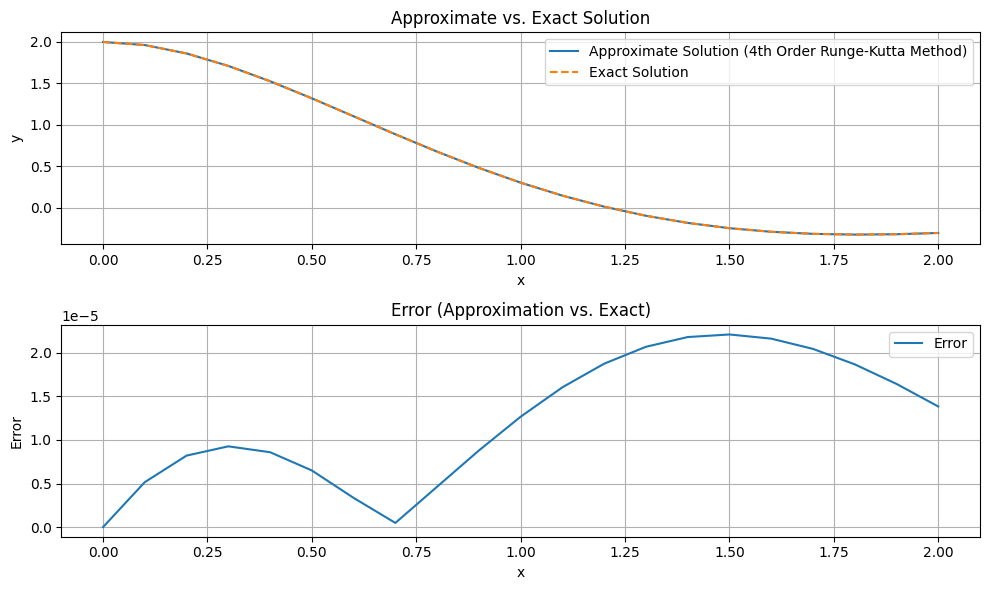

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y, z):
    """
    Define the derivative functions for the transformed system:
        dy/dx = z
        dz/dx = -2z - 4y
    """
    dydx = z
    dzdx = -2 * z - 4 * y
    return dydx, dzdx

def exact_solution(x):
    """
    Define the exact solution of the given differential equation.
    """
    return 2 * np.exp(-x) * (np.cos(np.sqrt(3) * x) + (1/np.sqrt(3)) * np.sin(np.sqrt(3) * x))

def runge_kutta_fourth_order(f, x0, y0, z0, h, num_steps):
    """
    Fourth-order Runge-Kutta method for solving a system of first-order differential equations:
        dy/dx = f1(x, y, z)
        dz/dx = f2(x, y, z)

    Parameters:
        f: Function representing the system of differential equations
        x0: Initial x value
        y0: Initial y value (y(x0))
        z0: Initial z value (dy/dx at x0)
        h: Step size
        num_steps: Number of steps to take

    Returns:
        x_values: List of x values
        y_values: List of corresponding y values (approximate solution for y)
        errors: List of errors (difference between exact and approximate solution)
    """
    x_values = [x0]
    y_values = [y0]
    z_values = [z0]
    errors = [0]  # Initialize error list with 0 for the initial value

    xn = x0
    yn = y0
    zn = z0

    print(f"Iteration 0: x = {xn:.2f}, y = {yn:.6f}, z = {zn:.6f}, Error = {errors[-1]:.6f}")

    for i in range(num_steps):
        # Calculate k1 values
        k1y, k1z = f(xn, yn, zn)

        # Calculate k2 values
        k2y, k2z = f(xn + 0.5 * h, yn + 0.5 * h * k1y, zn + 0.5 * h * k1z)

        # Calculate k3 values
        k3y, k3z = f(xn + 0.5 * h, yn + 0.5 * h * k2y, zn + 0.5 * h * k2z)

        # Calculate k4 values
        k4y, k4z = f(xn + h, yn + h * k3y, zn + h * k3z)

        # Update y and z values using 4th order Runge-Kutta formulas
        yn = yn + (h / 6) * (k1y + 2*k2y + 2*k3y + k4y)
        zn = zn + (h / 6) * (k1z + 2*k2z + 2*k3z + k4z)
        xn = xn + h

        x_values.append(xn)
        y_values.append(yn)
        z_values.append(zn)

        # Calculate error (difference from exact solution)
        exact_y = exact_solution(xn)
        error = np.abs(yn - exact_y)
        errors.append(error)

        print(f"Iteration {i+1}: x = {xn:.2f}, y = {yn:.6f}, z = {zn:.6f}, Error = {error:.6f}")

    return x_values, y_values, errors

# Initial conditions
x0 = 0
y0 = 2
z0 = 0
h = 0.1
num_steps = int(2 / h)  # Number of steps to cover the interval from 0 to 2

# Apply Fourth-order Runge-Kutta method for the system of differential equations
x_values, y_values, errors = runge_kutta_fourth_order(f, x0, y0, z0, h, num_steps)

# Plot the approximate solution for y and error
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(x_values, y_values, label='Approximate Solution (4th Order Runge-Kutta Method)')
plt.plot(x_values, exact_solution(np.array(x_values)), label='Exact Solution', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Approximate vs. Exact Solution')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(x_values, errors, label='Error')
plt.xlabel('x')
plt.ylabel('Error')
plt.title('Error (Approximation vs. Exact)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### 2nd Order Adams-Moulton

Iteration 0: x = 0.00, y = 2.000000, z = 0.000000, Error = 0.000000
Iteration 1: x = 0.10, y = 1.964000, z = -0.720000, Error = 0.001338
Iteration 2: x = 0.20, y = 1.863880, z = -1.283760, Error = 0.002706
Iteration 3: x = 0.30, y = 1.714884, z = -1.700007, Error = 0.004051
Iteration 4: x = 0.40, y = 1.531157, z = -1.980344, Error = 0.005231
Iteration 5: x = 0.50, y = 1.325542, z = -2.139166, Error = 0.006141
Iteration 6: x = 0.60, y = 1.109356, z = -2.192640, Error = 0.006719
Iteration 7: x = 0.70, y = 0.892261, z = -2.157804, Error = 0.006936
Iteration 8: x = 0.80, y = 0.682210, z = -2.051799, Error = 0.006795
Iteration 9: x = 0.90, y = 0.485474, z = -1.891236, Error = 0.006324
Iteration 10: x = 1.00, y = 0.306718, z = -1.691694, Error = 0.005569
Iteration 11: x = 1.10, y = 0.149121, z = -1.467349, Error = 0.004589
Iteration 12: x = 1.20, y = 0.014532, z = -1.230715, Error = 0.003449
Iteration 13: x = 1.30, y = -0.096361, z = -0.992495, Error = 0.002216
Iteration 14: x = 1.40, y = -0

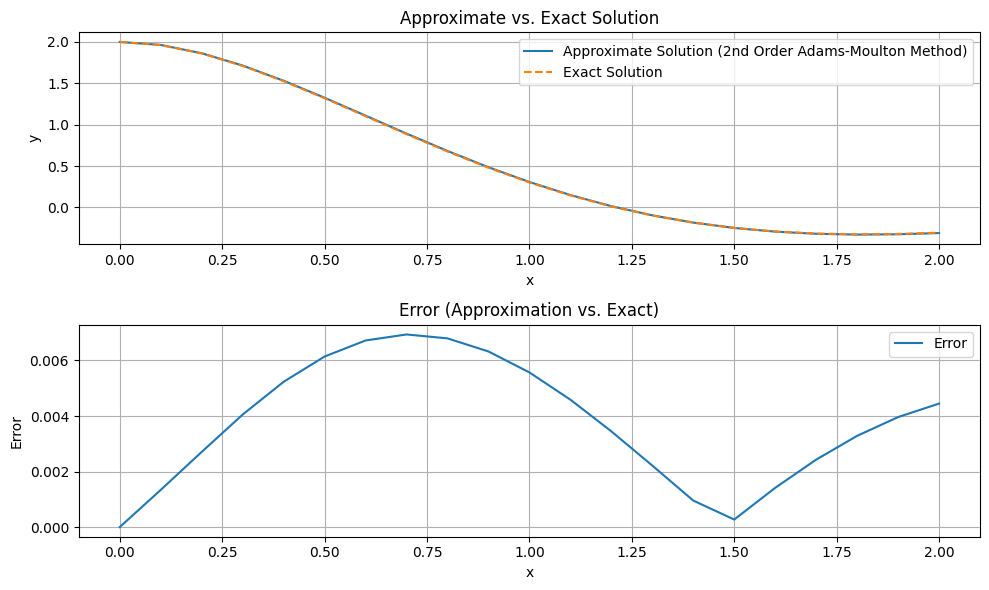

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y, z):
    """
    Define the derivative functions for the transformed system:
        dy/dx = z
        dz/dx = -2z - 4y
    """
    dydx = z
    dzdx = -2 * z - 4 * y
    return dydx, dzdx

def exact_solution(x):
    """
    Define the exact solution of the given differential equation.
    """
    return 2 * np.exp(-x) * (np.cos(np.sqrt(3) * x) + (1/np.sqrt(3)) * np.sin(np.sqrt(3) * x))

def adams_moulton_second_order(f, x0, y0, z0, h, num_steps):
    """
    Second-order Adams-Moulton method for solving a system of first-order differential equations:
        dy/dx = f1(x, y, z)
        dz/dx = f2(x, y, z)

    Parameters:
        f: Function representing the system of differential equations
        x0: Initial x value
        y0: Initial y value (y(x0))
        z0: Initial z value (dy/dx at x0)
        h: Step size
        num_steps: Number of steps to take

    Returns:
        x_values: List of x values
        y_values: List of corresponding y values (approximate solution for y)
        errors: List of errors (difference between exact and approximate solution)
    """
    x_values = [x0]
    y_values = [y0]
    z_values = [z0]
    errors = [0]  # Initialize error list with 0 for the initial value

    xn = x0
    yn = y0
    zn = z0

    print(f"Iteration 0: x = {xn:.2f}, y = {yn:.6f}, z = {zn:.6f}, Error = {errors[-1]:.6f}")

    for i in range(num_steps):
        # Predict using 2nd order Adams-Bashforth
        if i == 0:
            # Use 2nd order Runge-Kutta to get the second point (n=1)
            k1y, k1z = f(xn, yn, zn)
            k2y, k2z = f(xn + h, yn + h * k1y, zn + h * k1z)
            predictor_yn = yn + (h / 2) * (k1y + k2y)
            predictor_zn = zn + (h / 2) * (k1z + k2z)
        else:
            # Use Adams-Bashforth predictor for the next point
            predictor_yn = yn + (h / 2) * (3 * f(xn, yn, zn)[0] - f(x_values[-2], y_values[-2], z_values[-2])[0])
            predictor_zn = zn + (h / 2) * (3 * f(xn, yn, zn)[1] - f(x_values[-2], y_values[-2], z_values[-2])[1])

        # Correct using 2nd order Adams-Moulton
        corrector_yn = yn + (h / 2) * (f(xn + h, predictor_yn, predictor_zn)[0] + f(xn, yn, zn)[0])
        corrector_zn = zn + (h / 2) * (f(xn + h, predictor_yn, predictor_zn)[1] + f(xn, yn, zn)[1])

        # Update y and z values using corrected values
        xn = xn + h
        yn = corrector_yn
        zn = corrector_zn

        x_values.append(xn)
        y_values.append(yn)
        z_values.append(zn)

        # Calculate error (difference from exact solution)
        exact_y = exact_solution(xn)
        error = np.abs(yn - exact_y)
        errors.append(error)

        print(f"Iteration {i+1}: x = {xn:.2f}, y = {yn:.6f}, z = {zn:.6f}, Error = {error:.6f}")

    return x_values, y_values, errors

# Initial conditions
x0 = 0
y0 = 2
z0 = 0
h = 0.1
num_steps = int(2 / h)  # Number of steps to cover the interval from 0 to 2

# Apply Second-order Adams-Moulton method for the system of differential equations
x_values, y_values, errors = adams_moulton_second_order(f, x0, y0, z0, h, num_steps)

# Plot the approximate solution for y and error
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(x_values, y_values, label='Approximate Solution (2nd Order Adams-Moulton Method)')
plt.plot(x_values, exact_solution(np.array(x_values)), label='Exact Solution', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Approximate vs. Exact Solution')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(x_values, errors, label='Error')
plt.xlabel('x')
plt.ylabel('Error')
plt.title('Error (Approximation vs. Exact)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# 4. 고유값, 고유벡터 추정

###power method

In [ ]:
import numpy as np

def power_method(A, tol=1e-4, max_iterations=100):
    """
    Computes the dominant eigenvalue and eigenvector using the power method.

    Parameters:
        A (numpy.ndarray): The input matrix.
        tol (float): Tolerance for convergence.
        max_iterations (int): Maximum number of iterations.

    Returns:
        float: Dominant eigenvalue.
        numpy.ndarray: Dominant eigenvector.
    """
    n = A.shape[0]
    b_k = np.random.rand(n)

    for iteration in range(max_iterations):
        # Calculate the matrix-by-vector product Ab
        b_k1 = np.dot(A, b_k)

        # Calculate the norm
        b_k1_norm = np.linalg.norm(b_k1)

        # Re-normalize the vector
        b_k = b_k1 / b_k1_norm

        # Calculate the current eigenvalue approximation
        eigenvalue = b_k1_norm

        # Output current eigenvalue and eigenvector
        print(f"Iteration {iteration + 1}:")
        print("Eigenvalue:", eigenvalue)
        print("Eigenvector:", b_k)
        print()

        # Convergence check
        if np.linalg.norm(np.dot(A, b_k) - b_k1_norm * b_k) < tol:
            break

    # Final eigenvalue using Rayleigh quotient for accuracy
    eigenvalue = np.dot(b_k.T, np.dot(A, b_k)) / np.dot(b_k.T, b_k)
    eigenvector = b_k

    return eigenvalue, eigenvector

# Example usage:
A = np.array([[7,3,2,1],[3,9,-2,4],[2,-2,-4,2],[1,4,2,3]])

eigenvalue, eigenvector = power_method(A)

print("Final Dominant Eigenvalue:", eigenvalue)
print("Final Dominant Eigenvector:", eigenvector)



Iteration 1:
Eigenvalue: 12.831209351912024
Eigenvector: [ 0.40359334  0.80503876 -0.12573543  0.4161918 ]

Iteration 2:
Eigenvalue: 12.587123848019226
Eigenvector: [0.42940632 0.82404583 0.04229993 0.36710951]

Iteration 3:
Eigenvalue: 12.692980675349851
Eigenvector: [ 0.46716302  0.79480698 -0.01766801  0.38694757]

Iteration 4:
Eigenvalue: 12.71446140253612
Eigenvector: [0.47238915 0.79735019 0.01488693 0.3753126 ]

Iteration 5:
Eigenvalue: 12.718775383154247
Eigenvector: [0.47990949 0.79133371 0.0032358  0.37877087]

Iteration 6:
Eigenvalue: 12.719640399277978
Eigenvector: [0.4810364  0.79171607 0.00957182 0.37642798]

Iteration 7:
Eigenvalue: 12.719813928357176
Eigenvector: [0.48255224 0.79050859 0.00732789 0.37707535]

Iteration 8:
Eigenvalue: 12.719848771229463
Eigenvector: [0.48279839 0.79056597 0.0085635  0.37661363]

Iteration 9:
Eigenvalue: 12.719855774282967
Eigenvector: [0.48310511 0.79032472 0.00813202 0.3767362 ]

Iteration 10:
Eigenvalue: 12.719857183239675
Eigenvector:

### jacobi matrix

In [ ]:
import numpy as np

def jacobi_rotation(A):
    """
    Performs a single Jacobi rotation to zero out the largest off-diagonal element.

    Parameters:
        A (numpy.ndarray): A symmetric matrix.

    Returns:
        numpy.ndarray: The rotation matrix.
        numpy.ndarray: The updated matrix.
    """
    n = len(A)
    max_val = 0
    k = 0
    l = 0

    # Find the largest off-diagonal element in A
    for i in range(n):
        for j in range(i+1, n):
            if abs(A[i, j]) > max_val:
                max_val = abs(A[i, j])
                k, l = i, j

    if A[k, k] == A[l, l]:
        theta = np.pi / 4
    else:
        theta = 0.5 * np.arctan(2 * A[k, l] / (A[k, k] - A[l, l]))

    cos = np.cos(theta)
    sin = np.sin(theta)

    # Create the rotation matrix
    J = np.eye(n)
    J[k, k] = cos
    J[l, l] = cos
    J[k, l] = -sin
    J[l, k] = sin

    # Update the matrix A
    A_prime = J.T @ A @ J

    return J, A_prime

def jacobi_eigenvalues(A, tol=1e-4, max_iterations=100):
    """
    Computes the eigenvalues and eigenvectors of a symmetric matrix using the Jacobi method.

    Parameters:
        A (numpy.ndarray): A symmetric matrix.
        tol (float): Tolerance for convergence.
        max_iterations (int): Maximum number of iterations.

    Returns:
        numpy.ndarray: Eigenvalues.
        numpy.ndarray: Eigenvectors.
    """
    n = len(A)
    A = np.copy(A)
    V = np.eye(n)

    for i in range(max_iterations):
        J, A = jacobi_rotation(A)
        V = V @ J

        # Check for convergence
        off_diagonal_sum = np.sqrt(np.sum(np.triu(A, 1)**2) + np.sum(np.tril(A, -1)**2))

        # Output current eigenvalues and eigenvectors
        eigenvalues = np.diag(A)
        eigenvectors = V
        print(f"Iteration {i + 1}:")
        print("Eigenvalues:", eigenvalues)
        print("Eigenvectors:\n", eigenvectors)
        print()

        if off_diagonal_sum < tol:
            break

    return eigenvalues, eigenvectors

# Example usage:
A = np.array([[7,3,2,1],[3,9,-2,4],[2,-2,-4,2],[1,4,2,3]])

eigenvalues, eigenvectors = jacobi_eigenvalues(A)

print("Final Eigenvalues:")
print(eigenvalues)
print("Final Eigenvectors:")
print(eigenvectors)


Iteration 1:
Eigenvalues: [ 7. 11. -4.  1.]
Eigenvectors:
 [[ 1.          0.          0.          0.        ]
 [ 0.          0.89442719  0.         -0.4472136 ]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.4472136   0.          0.89442719]]

Iteration 2:
Eigenvalues: [ 5.28516488 12.71483512 -4.          1.        ]
Eigenvectors:
 [[ 0.87703532  0.4804259   0.          0.        ]
 [-0.42970599  0.78444424  0.         -0.4472136 ]
 [ 0.          0.          1.          0.        ]
 [-0.214853    0.39222212  0.          0.89442719]]

Iteration 3:
Eigenvalues: [ 5.28516488 12.71483512 -5.16742416  2.16742416]
Eigenvectors:
 [[ 0.87703532  0.4804259   0.          0.        ]
 [-0.42970599  0.78444424  0.17841599 -0.4100826 ]
 [ 0.          0.          0.91697256  0.39895028]
 [-0.214853    0.39222212 -0.35683198  0.82016519]]

Iteration 4:
Eigenvalues: [ 5.7135302  12.71483512 -5.59578949  2.16742416]
Eigenvectors:
 [[ 0.86026517  0.4804259  -0.17068918  0.        ]

### ex) power & jacobi

In [ ]:
import numpy as np

def power_method(A, tol=1e-4, max_iterations=100):
    """
    Computes the dominant eigenvalue and eigenvector using the power method.

    Parameters:
        A (numpy.ndarray): The input matrix.
        tol (float): Tolerance for convergence.
        max_iterations (int): Maximum number of iterations.

    Returns:
        float: Dominant eigenvalue.
        numpy.ndarray: Dominant eigenvector.
    """
    n = A.shape[0]
    b_k = np.random.rand(n)

    for iteration in range(max_iterations):
        # Calculate the matrix-by-vector product Ab
        b_k1 = np.dot(A, b_k)

        # Calculate the norm
        b_k1_norm = np.linalg.norm(b_k1)

        # Re-normalize the vector
        b_k = b_k1 / b_k1_norm

        # Calculate the current eigenvalue approximation
        eigenvalue = b_k1_norm

        # Output current eigenvalue and eigenvector
        print(f"Iteration {iteration + 1}:")
        print("Eigenvalue:", eigenvalue)
        print("Eigenvector:", b_k)
        print()

        # Convergence check
        if np.linalg.norm(np.dot(A, b_k) - b_k1_norm * b_k) < tol:
            break

    # Final eigenvalue using Rayleigh quotient for accuracy
    eigenvalue = np.dot(b_k.T, np.dot(A, b_k)) / np.dot(b_k.T, b_k)
    eigenvector = b_k

    return eigenvalue, eigenvector

# Example usage:
A = np.array([[2, np.sqrt(2),2],
              [np.sqrt(2),3,np.sqrt(2)],
              [2,np.sqrt(2),1]])

eigenvalue, eigenvector = power_method(A)

print("Final Dominant Eigenvalue:", eigenvalue)
print("Final Dominant Eigenvector:", eigenvector)



Iteration 1:
Eigenvalue: 4.870934222497613
Eigenvector: [0.59689043 0.60497652 0.52699643]

Iteration 2:
Eigenvalue: 5.278051797607958
Eigenvector: [0.58797068 0.64500041 0.48812391]

Iteration 3:
Eigenvalue: 5.289322429752519
Eigenvector: [0.57934784 0.65354851 0.48706307]

Iteration 4:
Eigenvalue: 5.28990892208095
Eigenvector: [0.57790768 0.65573497 0.48583368]

Iteration 5:
Eigenvalue: 5.289942931891354
Eigenvector: [0.5774792  0.65625706 0.48563819]

Iteration 6:
Eigenvalue: 5.289944954337069
Eigenvector: [0.57738264 0.65638607 0.48557863]

Iteration 7:
Eigenvalue: 5.289945075241177
Eigenvector: [0.5773581  0.65641749 0.48556534]

Final Dominant Eigenvalue: 5.289945082197206
Final Dominant Eigenvector: [0.5773581  0.65641749 0.48556534]


In [ ]:
import numpy as np

def jacobi_rotation(A):
    """
    Performs a single Jacobi rotation to zero out the largest off-diagonal element.

    Parameters:
        A (numpy.ndarray): A symmetric matrix.

    Returns:
        numpy.ndarray: The rotation matrix.
        numpy.ndarray: The updated matrix.
    """
    n = len(A)
    max_val = 0
    k = 0
    l = 0

    # Find the largest off-diagonal element in A
    for i in range(n):
        for j in range(i+1, n):
            if abs(A[i, j]) > max_val:
                max_val = abs(A[i, j])
                k, l = i, j

    if A[k, k] == A[l, l]:
        theta = np.pi / 4
    else:
        theta = 0.5 * np.arctan(2 * A[k, l] / (A[k, k] - A[l, l]))

    cos = np.cos(theta)
    sin = np.sin(theta)

    # Create the rotation matrix
    J = np.eye(n)
    J[k, k] = cos
    J[l, l] = cos
    J[k, l] = -sin
    J[l, k] = sin

    # Update the matrix A
    A_prime = J.T @ A @ J

    return J, A_prime

def jacobi_eigenvalues(A, tol=1e-4, max_iterations=100):
    """
    Computes the eigenvalues and eigenvectors of a symmetric matrix using the Jacobi method.

    Parameters:
        A (numpy.ndarray): A symmetric matrix.
        tol (float): Tolerance for convergence.
        max_iterations (int): Maximum number of iterations.

    Returns:
        numpy.ndarray: Eigenvalues.
        numpy.ndarray: Eigenvectors.
    """
    n = len(A)
    A = np.copy(A)
    V = np.eye(n)

    for i in range(max_iterations):
        J, A = jacobi_rotation(A)
        V = V @ J

        # Check for convergence
        off_diagonal_sum = np.sqrt(np.sum(np.triu(A, 1)**2) + np.sum(np.tril(A, -1)**2))

        # Output current eigenvalues and eigenvectors
        eigenvalues = np.diag(A)
        eigenvectors = V
        print(f"Iteration {i + 1}:")
        print("Eigenvalues:", eigenvalues)
        print("Eigenvectors:\n", eigenvectors)
        print()

        if off_diagonal_sum < tol:
            break

    return eigenvalues, eigenvectors

# Example usage:
A = np.array([[2, np.sqrt(2),2],
              [np.sqrt(2),3,np.sqrt(2)],
              [2,np.sqrt(2),1]])

eigenvalues, eigenvectors = jacobi_eigenvalues(A)

print("Final Eigenvalues:")
print(eigenvalues)
print("Final Eigenvectors:")
print(eigenvectors)

Iteration 1:
Eigenvalues: [ 3.56155281  3.         -0.56155281]
Eigenvectors:
 [[ 0.78820544  0.         -0.61541221]
 [ 0.          1.          0.        ]
 [ 0.61541221  0.          0.78820544]]

Iteration 2:
Eigenvalues: [ 5.28555081  1.27600201 -0.56155281]
Eigenvectors:
 [[ 0.59509611 -0.51684468 -0.61541221]
 [ 0.65572332  0.75500128  0.        ]
 [ 0.46463701 -0.40354013  0.78820544]]

Iteration 3:
Eigenvalues: [ 5.28555081  1.2943431  -0.57989391]
Eigenvectors:
 [[ 0.59509611 -0.57518842 -0.56126544]
 [ 0.65572332  0.75129802 -0.07468752]
 [ 0.46463701 -0.32358858  0.82425899]]

Iteration 4:
Eigenvalues: [ 5.28988224  1.2943431  -0.58422534]
Eigenvectors:
 [[ 0.57963567 -0.57518842 -0.57721813]
 [ 0.6534534   0.75129802 -0.09246595]
 [ 0.48684818 -0.32358858  0.81133795]]

Iteration 5:
Eigenvalues: [ 5.28994508  1.29428026 -0.58422534]
Eigenvectors:
 [[ 0.5773501  -0.57748255 -0.57721813]
 [ 0.65642766  0.74870073 -0.09246595]
 [ 0.48556111 -0.32551672  0.81133795]]

Iteration 

#5. 편미분 방정식 해법

### Explixit method

t = 0.00: u = ['0.000000', '38.268343', '70.710678', '92.387953', '100.000000', '92.387953', '70.710678', '38.268343', '0.000000']
t = 0.40: u = ['0.000000', '32.618881', '54.793565', '63.314168', '57.044481', '37.095108', '6.654527', '-29.496175', '0.000000']
t = 0.80: u = ['0.000000', '22.491176', '31.732438', '26.609764', '8.187181', '-20.454959', '-54.688686', '-25.322925', '0.000000']
t = 1.20: u = ['0.000000', '9.642775', '5.344717', '-11.875210', '-39.041456', '-71.674570', '-42.683957', '-17.602301', '0.000000']
t = 1.60: u = ['0.000000', '-3.875608', '-20.294316', '-46.382218', '-77.804002', '-49.506152', '-24.977813', '-7.685415', '0.000000']
t = 2.00: u = ['0.000000', '-16.038614', '-41.464934', '-72.083551', '-44.816559', '-21.173612', '-4.520505', '2.836113', '0.000000']


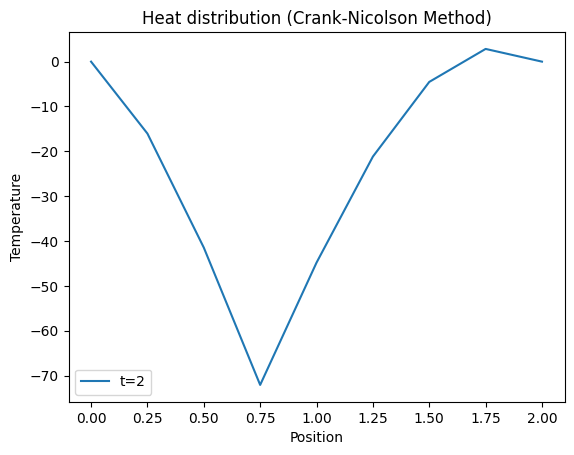

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 15 / 99
dx = 0.25
dt = 0.4
L = 2.0
T = 2.0
nx = int(L / dx) + 1
nt = int(T / dt) + 1

# Initial condition
x = np.linspace(0, L, nx)
u = 100 * np.sin(np.pi * x / 2)

# Boundary conditions
u[0] = 0
u[-1] = 0

# Time stepping
for n in range(nt):
    if n > 0:  # Skip the initial condition plot
        u_new = u.copy()
        for i in range(1, nx - 1):
            u_new[i] = u[i] + alpha * dt / dx**2 * (u[i + 1] - 2 * u[i] + u[i - 1])
            u = u_new
    print(f"t = {n * dt:.2f}: u = {[f'{val:.6f}' for val in u]}")

# Plot the result
plt.plot(x, u, label='t=2')
plt.xlabel('Position')
plt.ylabel('Temperature')
plt.title('Heat distribution (Crank-Nicolson Method)')
plt.legend()
plt.show()

### Implicit method

t = 0.00: u = ['0.000000', '38.268343', '70.710678', '92.387953', '100.000000', '92.387953', '70.710678', '38.268343', '0.000000']
t = 0.40: u = ['0.000000', '33.345612', '61.614656', '80.503428', '87.136282', '80.503428', '61.614656', '33.345612', '0.000000']
t = 0.80: u = ['0.000000', '29.056126', '53.688720', '70.147694', '75.927317', '70.147694', '53.688720', '29.056126', '0.000000']
t = 1.20: u = ['0.000000', '25.318428', '46.782355', '61.124092', '66.160241', '61.124092', '46.782355', '25.318428', '0.000000']
t = 1.60: u = ['0.000000', '22.061537', '40.764405', '53.261262', '57.649574', '53.261262', '40.764405', '22.061537', '0.000000']
t = 2.00: u = ['0.000000', '19.223603', '35.520587', '46.409883', '50.233696', '46.409883', '35.520587', '19.223603', '0.000000']


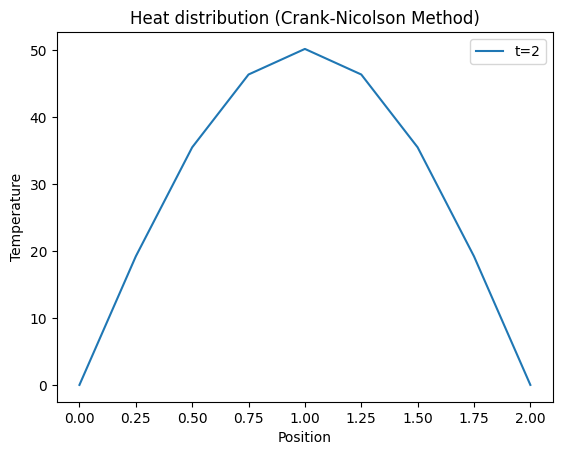

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 15 / 99
dx = 0.25
dt = 0.4
L = 2.0
T = 2.0
nx = int(L / dx) + 1
nt = int(T / dt) + 1

# Initial condition
x = np.linspace(0, L, nx)
u = 100 * np.sin(np.pi * x / 2)

# Boundary conditions
u[0] = 0
u[-1] = 0

# Coefficient matrix for implicit method
A = np.zeros((nx, nx))
for i in range(1, nx - 1):
    A[i, i - 1] = -alpha * dt / dx**2
    A[i, i] = 1 + 2 * alpha * dt / dx**2
    A[i, i + 1] = -alpha * dt / dx**2
    A[0, 0] = A[-1, -1] = 1

# Time stepping
for n in range(nt):
    if n > 0:  # Skip the initial condition plot
        u = np.linalg.solve(A, u)
    print(f"t = {n * dt:.2f}: u = {[f'{val:.6f}' for val in u]}")

# Plot the result
plt.plot(x, u, label='t=2')
plt.xlabel('Position')
plt.ylabel('Temperature')
plt.title('Heat distribution (Crank-Nicolson Method)')
plt.legend()
plt.show()

### Crank-Nicolson method

t = 0.00: u = ['0.000000', '38.268343', '70.710678', '92.387953', '100.000000', '92.387953', '70.710678', '38.268343', '0.000000']
t = 0.40: u = ['0.000000', '33.007224', '60.989397', '79.686487', '86.252032', '79.686487', '60.989397', '33.007224', '0.000000']
t = 0.80: u = ['0.000000', '28.469401', '52.604594', '68.731215', '74.394131', '68.731215', '52.604594', '28.469401', '0.000000']
t = 1.20: u = ['0.000000', '24.555437', '45.372532', '59.282069', '64.166450', '59.282069', '45.372532', '24.555437', '0.000000']
t = 1.60: u = ['0.000000', '21.179564', '39.134731', '51.131990', '55.344867', '51.131990', '39.134731', '21.179564', '0.000000']
t = 2.00: u = ['0.000000', '18.267804', '33.754500', '44.102380', '47.736072', '44.102380', '33.754500', '18.267804', '0.000000']


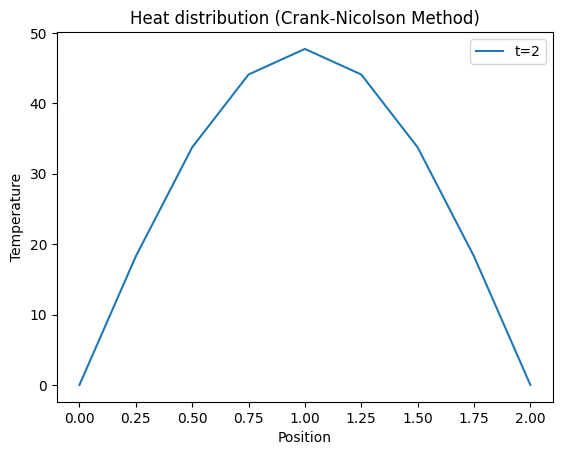

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 15 / 99
dx = 0.25
dt = 0.4
L = 2.0
T = 2.0
nx = int(L / dx) + 1
nt = int(T / dt) + 1

# Initial condition
x = np.linspace(0, L, nx)
u = 100 * np.sin(np.pi * x / 2)

# Boundary conditions
u[0] = 0
u[-1] = 0

# Coefficient matrices for Crank-Nicolson method
A = np.zeros((nx, nx))
B = np.zeros((nx, nx))

for i in range(1, nx - 1):
    A[i, i - 1] = -alpha * dt / (2 * dx**2)
    A[i, i] = 1 + alpha * dt / dx**2
    A[i, i + 1] = -alpha * dt / (2 * dx**2)

    B[i, i - 1] = alpha * dt / (2 * dx**2)
    B[i, i] = 1 - alpha * dt / dx**2
    B[i, i + 1] = alpha * dt / (2 * dx**2)

    A[0, 0] = A[-1, -1] = 1
    B[0, 0] = B[-1, -1] = 1

# Time stepping
for n in range(nt):
    if n > 0:  # Skip the initial condition plot
        u = np.linalg.solve(A, np.dot(B, u))
    print(f"t = {n * dt:.2f}: u = {[f'{val:.6f}' for val in u]}")

# Plot the result
plt.plot(x, u, label='t=2')
plt.xlabel('Position')
plt.ylabel('Temperature')
plt.title('Heat distribution (Crank-Nicolson Method)')
plt.legend()
plt.show()